# Example 1: Open Loop Analysis of a Coupled Mass Spring System

In [54]:
from IPython.display import Image, display
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

display(Image(url="https://fbswiki.org/wiki/images/b/bd/Springmass-coupled.png"))


We wish to analyze the time and the  frequency response of this system using a variety of python-control functions for linear systems analyze

## System dynamics
the dynamic of system is described by the following equations:
$$
m \ddot{q}_1 = -2 q_1 - c \dot{q}_1 + k q_2
$$
$$
m \ddot{q}_2 = k q_1 - 2 k q_2 - c \dot{q}_2 + k u
$$
or in the state space form:
$$
\frac{dx}{dt} =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-\frac{2k}{m} & \frac{k}{m} & -\frac{c}{m} & 0\\
\frac{k}{m} & -\frac{2k}{m} & 0 & -\frac{c}{m}\\
\end{bmatrix}
x
+
\begin{bmatrix}
0 \\
0 \\
0 \\
\frac{k}{m}
\end{bmatrix} u.
$$

In [55]:
#define parameter of the system
m,c, k = 1, 0.1, 2
#state space representation
A = np.array([[0, 0, 1, 0.],
              [0, 0, 0, 1.],
              [-2*k/m, k/m, -c/m, 0],
              [k/m, -2*k/m, 0, -c/m]])
B = np.array([[0], [0], [0], [k/m]])
C = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])
D = np.array([[0],
              [0]])
#Create state space system
sys = ctrl.ss(A, B, C, D)
print(sys)



<StateSpace>: sys[7]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.   0.   1.   0. ]
     [ 0.   0.   0.   1. ]
     [-4.   2.  -0.1  0. ]
     [ 2.  -4.   0.  -0.1]]

B = [[0.]
     [0.]
     [0.]
     [2.]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]]

D = [[0.]
     [0.]]


## Initial response
The initial_response function can be used to compute the response of the system with no input, but starting from a given initial condition. This function returns a response object, which can be used for plotting

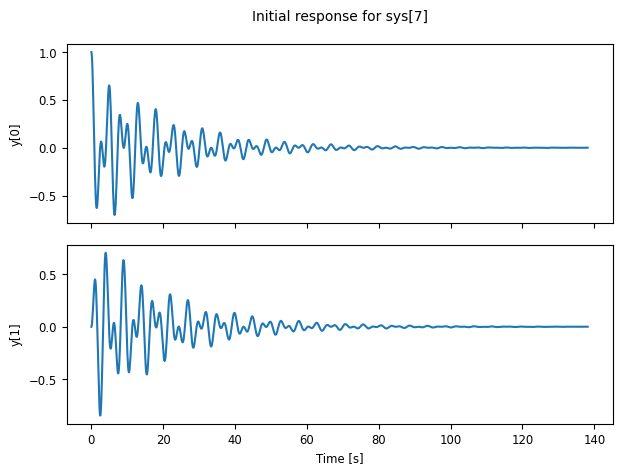

In [56]:
response = ctrl.initial_response(sys, x0 = [1, 0, 0, 0])
clpt = response.plot()

/tmp/ipykernel_62532/2601097888.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('$x_1$', '$x_2$')


Text(0.5, 1.0, 'Initial Condition Response $x_1 = 1$, $x_2 = 0$ ')

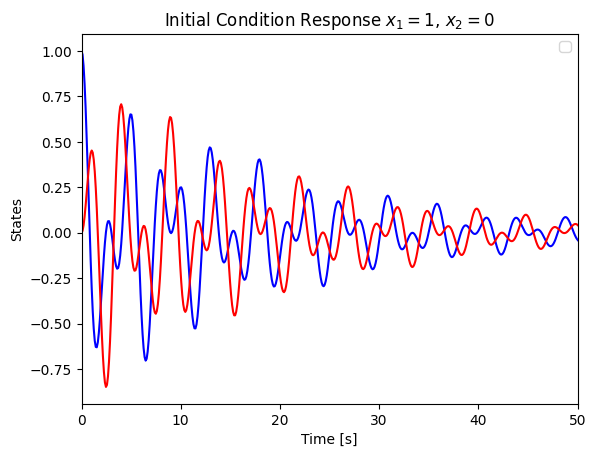

In [57]:
t = response.time
x = response.states
plt.plot(t, x[0], 'b', t, x[1], 'r')
plt.legend('$x_1$', '$x_2$')
plt.xlim(0,50)
plt.ylabel('States')
plt.xlabel('Time [s]')
plt.title('Initial Condition Response $x_1 = 1$, $x_2 = 0$ ' )

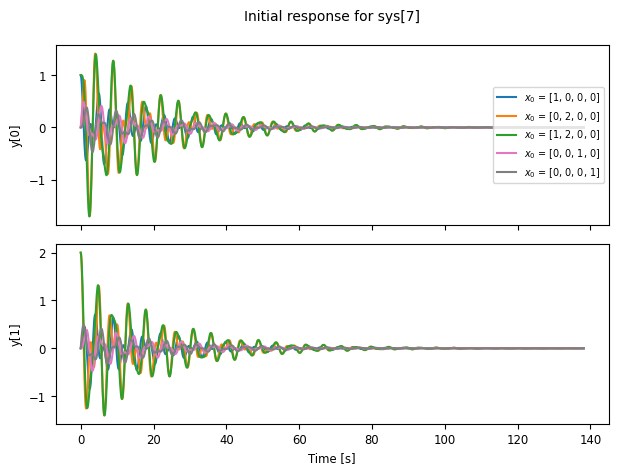

In [58]:
for X0 in [[1, 0, 0, 0], [0, 2, 0, 0], [1, 2, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]:
    response_loop = ctrl.initial_response(sys, x0 = X0)
    response_loop.plot(label = f'$x_0$ = {X0}')

#loop over different initial conditions for tunning the system


## Step response
Similar to initial_response, you can also generate a step response for a linear system using the step_response function, which returns a time response object


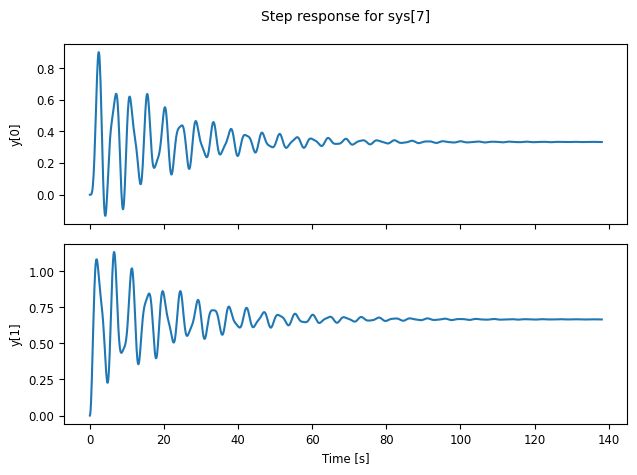

In [59]:
cplt = ctrl.step_response(sys).plot()

In [60]:
# we can analyze the properties of the system using step_info command:
info = ctrl.step_info(sys)
print("Input 0 output 0 rise time = ", info[0][0]['RiseTime'], "seconds\ n",)
print(info)


Input 0 output 0 rise time =  0.6153902252990775 seconds\ n
[[{'RiseTime': 0.6153902252990775, 'SettlingTime': 89.02645259326653, 'SettlingMin': -0.13272845655369328, 'SettlingMax': 0.9005994876222033, 'Overshoot': 170.179846286661, 'Undershoot': 39.81853696610799, 'Peak': 0.9005994876222033, 'PeakTime': 2.3589958636464634, 'SteadyStateValue': 0.3333333333333333}], [{'RiseTime': 0.6153902252990775, 'SettlingTime': 73.6416969607896, 'SettlingMin': 0.22760198207822407, 'SettlingMax': 1.1338933771021489, 'Overshoot': 70.08400656532234, 'Undershoot': 0.0, 'Peak': 1.1338933771021489, 'PeakTime': 6.564162403190159, 'SteadyStateValue': 0.6666666666666666}]]


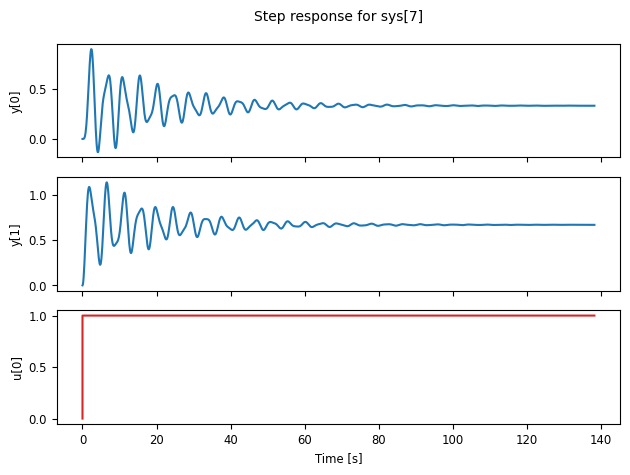

In [61]:
stepresp = ctrl.step_response(sys)
cplt = stepresp.plot(plot_inputs = True)

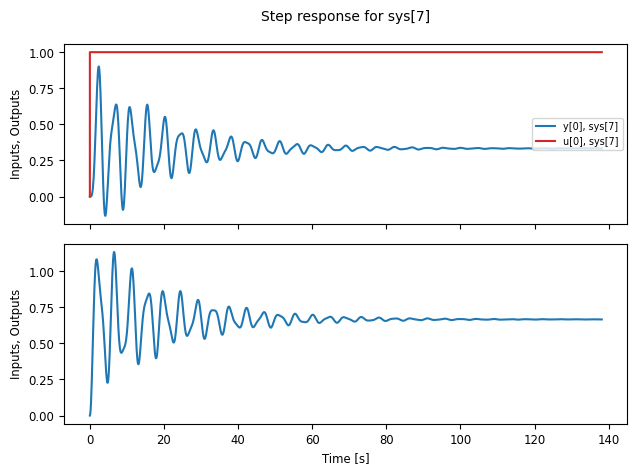

In [62]:
cplt = stepresp.plot(plot_inputs = 'overlay')

In [63]:
print(f"stepresp.time.shape: {stepresp.time.shape}")
print(f"stepresp.outputs.shape: {stepresp.outputs.shape}")
print(f"stepresp.inputs.shape: {stepresp.inputs.shape}")
print(f"stepresp.states.shape: {stepresp.states.shape}")    
print(f"stepresp.outputs: {stepresp.outputs}")  

stepresp.time.shape: (1348,)
stepresp.outputs.shape: (2, 1, 1348)
stepresp.inputs.shape: (1, 1, 1348)
stepresp.states.shape: (4, 1, 1348)
stepresp.outputs: [[[0.00000000e+00 1.83166962e-05 2.89422601e-04 ... 3.32849875e-01
   3.32909708e-01 3.32975418e-01]]

 [[0.00000000e+00 1.04470423e-02 4.12108072e-02 ... 6.66151249e-01
   6.66129327e-01 6.66121220e-01]]]


## Force response
To compute the response to an input, using the convolution equation, we can use the forced_response function:

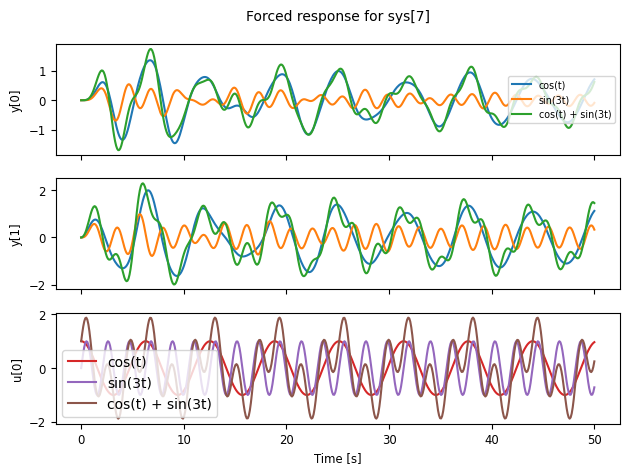

In [64]:
T = np.linspace(0, 50, 500)
U1 = np.cos(T)
U2 = np.sin(3 * T)

resp1 = ctrl.forced_response(sys, T, U1)
resp2 = ctrl.forced_response(sys, T, U2)
resp3 = ctrl.forced_response(sys, T, U1 + U2)

resp1.plot(label = 'cos(t)')
resp2.plot(label = 'sin(3t)')
resp3.plot(label = 'cos(t) + sin(3t)')
plt.legend()    


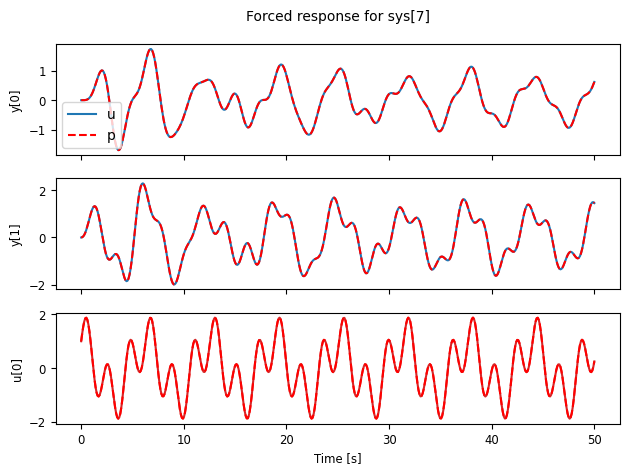

In [65]:
#show that the system response is linear
cplt = resp3.plot(label = "G(U1 + U2)")
cplt.axes[0, 0].plot(resp1.time, resp1.outputs[0] + resp2.outputs[0], 'r--', label = "G(U1) + G(U2)")
cplt.axes[1, 0].plot(resp1.time, resp1.outputs[1] + resp2.outputs[1], 'r--')
cplt.axes[2, 0].plot(resp1.time, resp1.inputs[0] + resp2.inputs[0], 'r--')
cplt.axes[0, 0].legend('upper right')

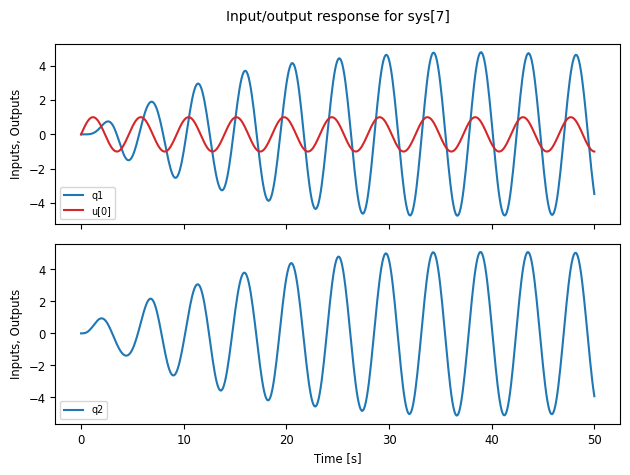

In [66]:
# Manual computation of frequency response
resp = ctrl.input_output_response(sys, T, np.sin(1.35 * T))
resp.plot(
    plot_inputs='overlay',
    legend_map=np.array([['lower left'], ['lower left']]),
    label=[['q1', 'u[0]'], ['q2', None]])
